In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os



In [2]:
embeddings = np.load("chest-xray14_embeddings.npy")
annotation = pd.read_csv('Data_Entry_2017.csv')
print(annotation)

             Image Index          Finding Labels  Follow-up #  Patient ID  \
0       00000001_000.png            Cardiomegaly            0           1   
1       00000001_001.png  Cardiomegaly|Emphysema            1           1   
2       00000001_002.png   Cardiomegaly|Effusion            2           1   
3       00000002_000.png              No Finding            0           2   
4       00000003_000.png                  Hernia            0           3   
...                  ...                     ...          ...         ...   
112115  00030801_001.png          Mass|Pneumonia            1       30801   
112116  00030802_000.png              No Finding            0       30802   
112117  00030803_000.png              No Finding            0       30803   
112118  00030804_000.png              No Finding            0       30804   
112119  00030805_000.png              No Finding            0       30805   

        Patient Age Patient Gender View Position  OriginalImage[Width  \
0 

In [3]:

file_path = "selected_png_list.txt"
ids = []

with open(file_path, 'r') as file:
    for line in file:
        full_path = line.strip()  
        filename = os.path.basename(full_path)
        ids.append(filename)

label_dict = annotation.set_index('Image Index')['Finding Labels'].to_dict()

labels = []
for id in ids:
    if label_dict[id] == 'No Finding':
        labels.append(0)
    else:
        labels.append(1)

df = embeddings

mc_df = df - np.mean(df, axis=0)
N, k = mc_df.shape

S = (1/N) * mc_df.transpose() @ mc_df
print(S.shape)

eig_val, eig_vectors = np.linalg.eigh(S)

eig_val_desc = eig_val[::-1]
eig_vectors_desc = eig_vectors[:, ::-1]

U = eig_vectors_desc[:, :343]

X_reduced = mc_df @ U

print(X_reduced.shape)




(512, 512)
(9600, 343)


In [4]:
# Create embeddings train/test split.
# Find the 80% index.
cutoff_inx = int(len(embeddings) * 0.8)

# Split the dataset.
X_train = embeddings[0:cutoff_inx]
X_test = embeddings[cutoff_inx:]
y_test = labels[cutoff_inx:]
y_train = labels[0:cutoff_inx]

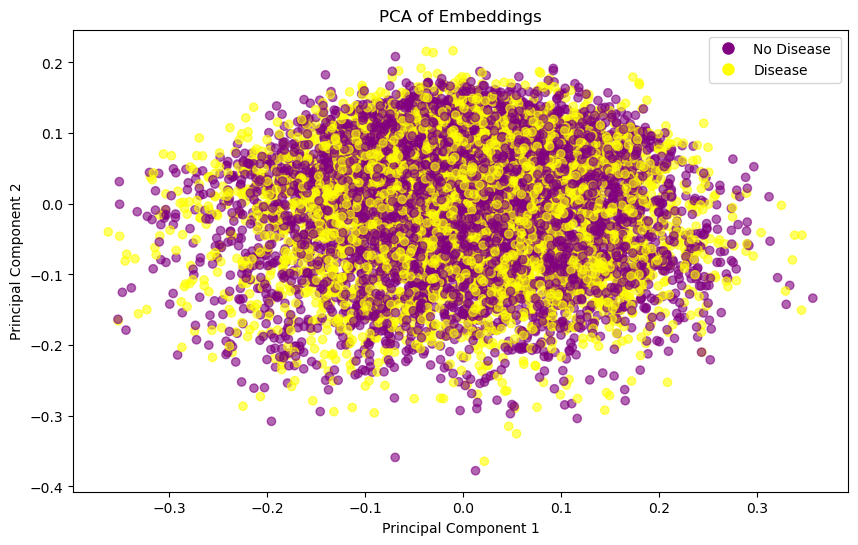

In [5]:
def plot_pca(principal_components, labels):
    plt.figure(figsize=(10, 6))

    # Create a color map for binary labels
    color_map = {0: 'purple', 1: 'yellow'}
    # Map labels to colors using a list comprehension
    scatter_colors = [color_map[label] for label in labels]

    # Scatter plot
    scatter = plt.scatter(principal_components[:, 0], principal_components[:, 1],
                          c=scatter_colors, alpha=0.6)

    # Create a legend manually
    from matplotlib.lines import Line2D
    legend_elements = [Line2D([0], [0], marker='o', color='w', label='No Disease ',
                              markerfacecolor='purple', markersize=10),
                       Line2D([0], [0], marker='o', color='w', label='Disease',
                              markerfacecolor='yellow', markersize=10)]
    plt.legend(handles=legend_elements)

    plt.title('PCA of Embeddings')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.savefig('pca.png', dpi=600)
    plt.show()

plot_pca(X_reduced, labels)